# Jupyter Notebook - Music Demos

This build incorporates a range of Python packages that can be used to support the creation of rich, interactive materials relating to music.

## `abjad`

`abjad` is a python package that wraps Lilypond and supports the creation of musical scores [[docs](http://projectabjad.org/)].

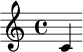

In [1]:
%load_ext abjad.ext.ipython
import abjad as abj

note = abj.Note("c'4")
abj.show(note)

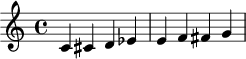

In [2]:
duration = abj.Duration(1, 4)
notes = [abj.Note(pitch, duration) for pitch in range(8)]
staff = abj.Staff(notes)
abj.show(staff)

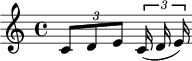

In [3]:
tuplet_1 = abj.Tuplet((2, 3), "c'8 d' e'")
beam = abj.Beam()
abj.attach(beam, tuplet_1[:])
tuplet_2 = abj.Tuplet((2, 3), "c'16 d' e'")
slur = abj.Slur()
abj.attach(slur, tuplet_2[:])
staff = abj.Staff([tuplet_1, tuplet_2])
abj.show(staff) 

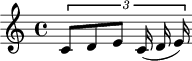

In [4]:
tuplets = staff[:]
abj.mutate(tuplets).fuse()
abj.show(staff) 

## `music21`

The `music21` package is a [toolkit for musicology](http://web.mit.edu/music21/).

The toolkit can be used to display notation defined in a variety of ways.

In [8]:
#The setting of environment variables and the display of notation is borked on Linux
#Use crappy workarounds for now - or perhaps try a conda install?
from music21 import *

environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'
environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
environment.set("musicxmlPath", "/usr/bin/musescore")

from IPython.display import Image

def render(s):
    s.show('lily.png')
    return Image(filename=s.write('lily.png'))

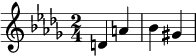

In [9]:
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('2/4')
m1.keySignature = key.KeySignature(-5)
m1.append([note.Note('D'), note.Note('A')])
m2 = stream.Measure()
m2.append([note.Note('B-'), note.Note('G#')])
p = stream.Part()
p.append([m1, m2])
render(p)

### TinyNotation

In [30]:
def tiny(t):
    return render( converter.parse('tinyNotation: {}'.format(t)) )

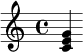

In [10]:
c = chord.Chord("C4 E4 G4")
c.isConsonant()
c.show('lily.png')
Image(filename=c.write('lily.png'))

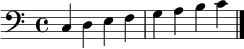

In [15]:
from music21 import converter
s = converter.parse('tinyNotation: 4/4 C4 D4 E4 F4 G4 A4 B4 c4')
render(s)

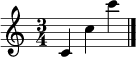

In [22]:
tiny("3/4 c4 c'4 c''4")

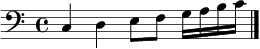

In [23]:
tiny('4/4 C4 D E8 F G16 A B c')

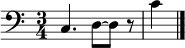

In [25]:
tiny('3/4 C.4 D8~ D8 r c4')

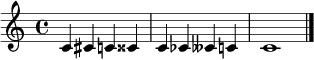

In [26]:
tiny('4/4 c4 c# c c## cn c- c-- c c1')

In [ ]:
#?? audio embed note working? 
#- requires a stylesheet served from http but this server is on https and mixed protocol disallowed

In [11]:
c.show('midi')

In [17]:
def playMidi(filename):
    mf = midi.MidiFile()
    mf.open(filename)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

c.write('midi',fp='tmp.midi')
playMidi('tmp.midi')

In [15]:
#%load_ext music21.ipython21
#extension is broken?
#c.show()

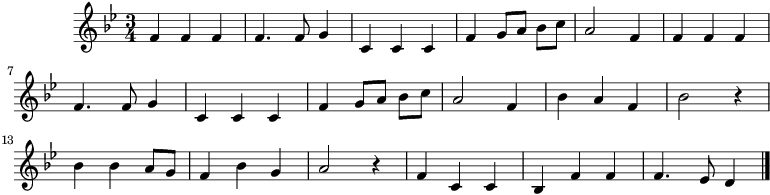

In [19]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']

render(alto)

##  Underlying `lilypond` Package

`abjad` and `music21` both make use of Lilypod; I wonder if we could we define some blockmagic to accept lilypond scores,process them with Lilypond, and render the result?

In [103]:
import os

def lp(score):
    with open("test.ly", "w") as out_file:
        out_file.write(score)
    os.system( "lilypond --png test.ly" )
    return Image(filename='test.png')

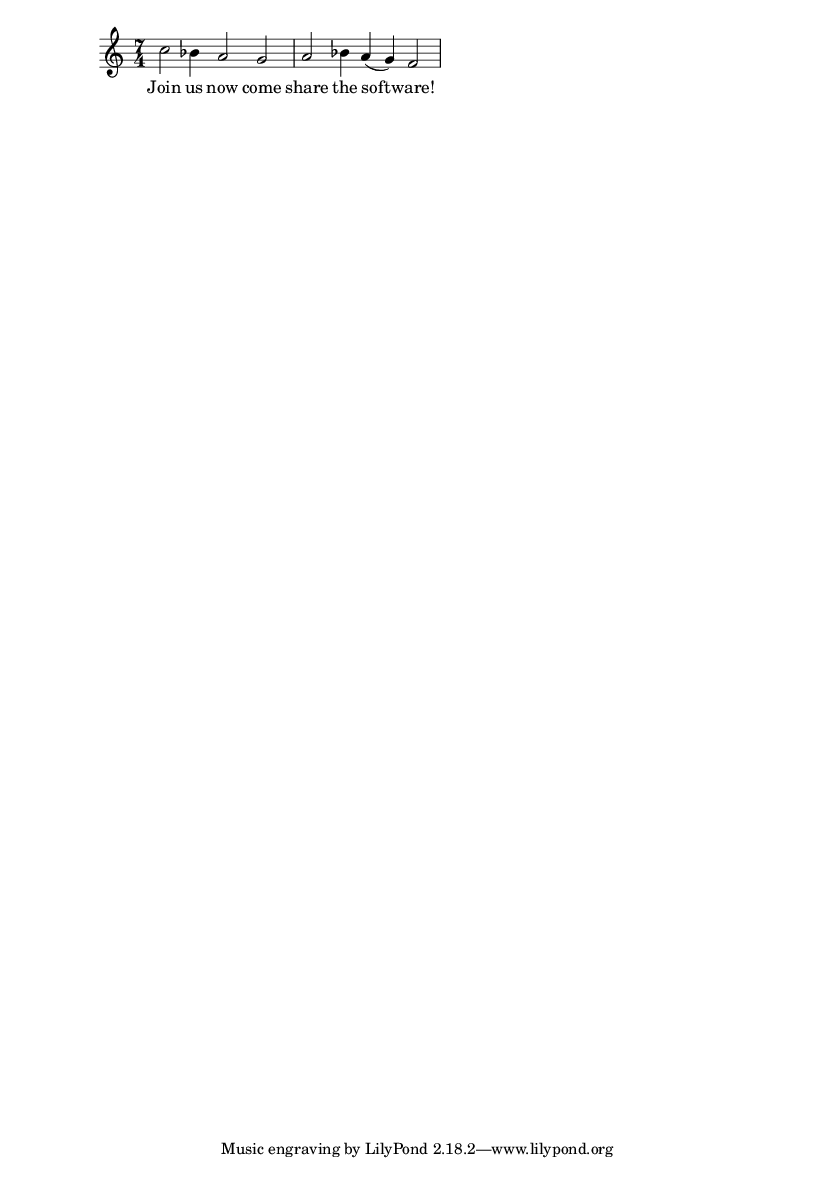

In [106]:
score=r'''
\version "2.18.2"
\score {
  \relative c'' {
    \time 7/4
    c2 bes4 a2 g a bes4 a( g) f2
  }
  \addlyrics {
    Join us now come share the soft -- ware!
  }
  \layout { }
}
'''

lp(score)